# Univariate distributions

> In this post, we will learn the distribution model with single variable, the univariate distributions. This is the summary of lecture "Probabilistic Deep Learning with Tensorflow 2" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Deep_Learning, Tensorflow, Probability]
- image: 

In [22]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 10)

print("Tensorflow : v" + tf.__version__)
print("Tensorflow probability : v" + tfp.__version__)

Tensorflow : v2.3.1
Tensorflow probability : v0.11.1


## Normal distribution

In [4]:
# Define distribution module
tfd = tfp.distributions

# Univariate distribution: Normal distribution
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [5]:
# Sample from distribution
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.30101883>

In [6]:
# Multiple Samples from distribution
normal.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.42610183,  0.68530667, -1.3152323 ], dtype=float32)>

In [7]:
# Probability density function at the given probability
normal.prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.35206532>

In [8]:
# Log probability
normal.log_prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0439385>

## Bernoulli Distribution

In [9]:
# Bernoulli distribution
bernoulli = tfd.Bernoulli(probs=0.7)
print(bernoulli)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)


In [10]:
# Bernoulli distribution with logits (the value of the sigmoid function)
bernoulli = tfd.Bernoulli(logits=0.847)
print(bernoulli)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)


In [11]:
# Sample from distribution
bernoulli.sample(3)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 1, 1])>

In [12]:
# PDF at the given probability
bernoulli.prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6999374>

In [13]:
# Log probability
bernoulli.log_prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.3567643>

In [14]:
# Batch shaped bernoulli distribution
batched_bernoulli = tfd.Bernoulli(probs=[0.4, 0.5])
print(batched_bernoulli)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)


In [16]:
# Access batch_shape
batched_bernoulli.batch_shape

TensorShape([2])

In [17]:
# Sampling from distribution
batched_bernoulli.sample(3)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1]])>

In [18]:
# Probs from each distribution
batched_bernoulli.prob([1, 1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4, 0.5], dtype=float32)>

In [19]:
# Log probabilities
batched_bernoulli.log_prob([1, 1])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.9162907, -0.6931472], dtype=float32)>

## Coding Tutorials

In [23]:
# Create a normal distribution from tensorflow Distributions
normal = tfd.Normal(loc=0., scale=1.)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [24]:
# Sample from the chosen distribution
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.8841431>

In [25]:
# Or sample multiple times
normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.58731544,  1.7064235 , -1.0901706 , -0.00785949, -0.00652707,
        0.59414554,  0.07159981, -0.75130785,  0.6389091 , -1.7767404 ],
      dtype=float32)>

In [26]:
# Obtain value of probability's density
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [27]:
# Obtain value of log-probability
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [28]:
# Verify that this really is the log of the probability
np.log(normal.prob(0))

-0.9189385

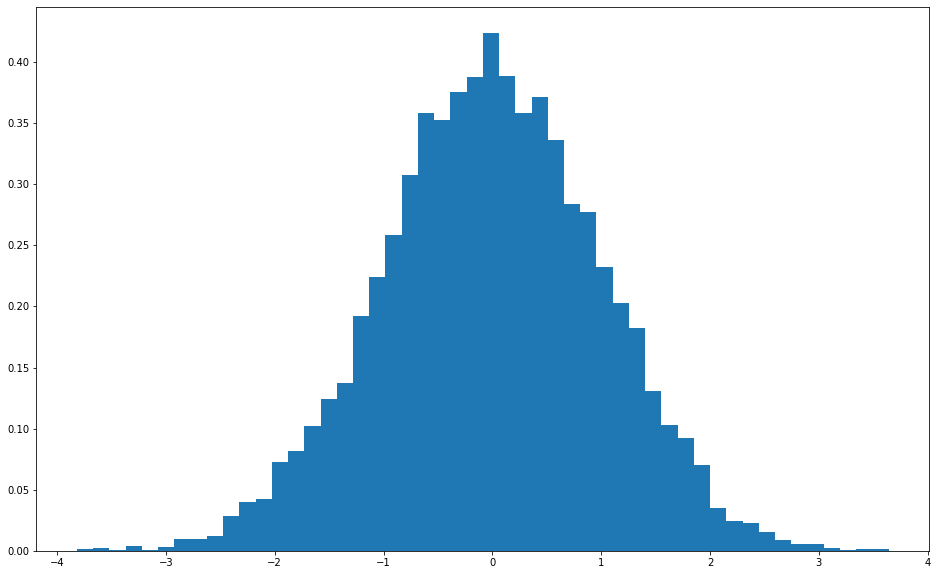

In [29]:
# Plot a histogram, approximating the density
plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

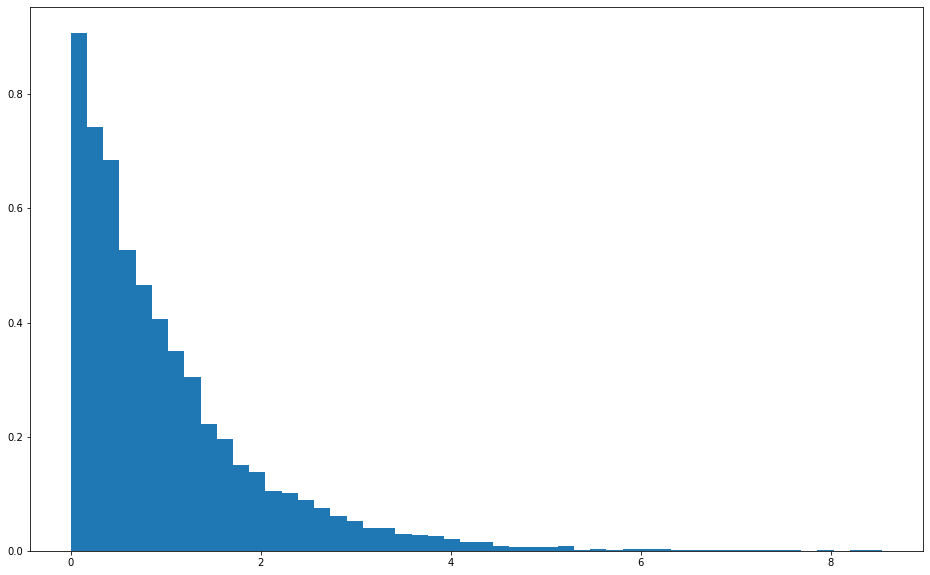

In [30]:
# Do the same for the exponential distribution
exponential = tfd.Exponential(rate=1.)
plt.hist(exponential.sample(10000), bins=50, density=True)
plt.show()

In [31]:
# Sample as before
exponential.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.31451935, 0.07696576, 0.5862613 , 0.09255137, 0.7166047 ,
       0.1065938 , 0.5705156 , 0.47359532, 5.732222  , 0.63814664],
      dtype=float32)>

In [32]:
# Create a Bernoulli distribution (distrete)
bernoulli = tfd.Bernoulli(probs=0.8)
bernoulli.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1])>

### A word of caution on discrete distributions

In [33]:
# Calculate Bernoulli prob and see that 0.5 and -1 
# do not give the correct probability
for k in [0, 0.5, 1, -1]:
    print('prob result: {} for k = {}'.format(bernoulli.prob(k), k))

prob result: 0.20000000298023224 for k = 0
prob result: 0.4000000059604645 for k = 0.5
prob result: 0.800000011920929 for k = 1
prob result: 0.04999999701976776 for k = -1


In [34]:
# Replicate the scores to see what is occurring under the hood
def my_bernoulli(p_success, k):
    return np.power(p_success, k) * np.power((1 - p_success), (1 - k))

In [35]:
# Evaluate it as before
for k in [0, 0.5, 1, -1]:
    print('prob result: {} for k = {}'.format(my_bernoulli(p_success=0.8, k=k), 
                                              k))

prob result: 0.19999999999999996 for k = 0
prob result: 0.3999999999999999 for k = 0.5
prob result: 0.8 for k = 1
prob result: 0.049999999999999975 for k = -1


### Work with batch distributions

In [36]:
# Create a batched Bernoulli distribution
bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [37]:
# Sample from it, noting the shape
bernoulli_batch.sample(5)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[1, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1]])>

In [38]:
# Use a batch shape with higher rank
probs = [[[0.5, 0.5],
          [0.8, 0.3],
          [0.25, 0.75]]]

bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [39]:
# Sample from this batch of distributions
bernoulli_batch_2D.sample(5)

<tf.Tensor: shape=(5, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 1]]],


       [[[0, 1],
         [0, 0],
         [0, 1]]],


       [[[1, 0],
         [0, 0],
         [0, 1]]],


       [[[0, 1],
         [1, 1],
         [0, 1]]],


       [[[1, 0],
         [1, 0],
         [1, 1]]]])>

In [40]:
# Determine probabilties from this batch distribution
bernoulli_batch_2D.prob([[1, 0],
                         [0, 0],
                         [1, 1]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5      , 0.5      ],
        [0.2      , 0.6999999],
        [0.25     , 0.75     ]]], dtype=float32)>